In [64]:
# Import the Libraries

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [65]:
# Import Data

data = pd.read_csv('Datasets/software.csv')
data

,uniq_Opnd,total_Op,total_Opnd,branchCount,target
0,5.1,3.5,1.4,0.2,pirated
1,4.9,3.0,1.4,0.2,pirated
2,4.7,3.2,1.3,0.2,pirated
3,4.6,3.1,1.5,0.2,pirated
4,5.0,3.6,1.4,0.2,pirated
...,...,...,...,...,...
10879,1.1,3.7,3.6,-0.7,unpirated
10880,1.0,3.7,3.6,-0.7,unpirated
10881,1.0,3.7,3.6,-0.7,unpirated
10882,0.9,3.7,3.6,-0.8,unpirated


## Basic Data Analysis

In [66]:
data.head()

,uniq_Opnd,total_Op,total_Opnd,branchCount,target
0,5.1,3.5,1.4,0.2,pirated
1,4.9,3.0,1.4,0.2,pirated
2,4.7,3.2,1.3,0.2,pirated
3,4.6,3.1,1.5,0.2,pirated
4,5.0,3.6,1.4,0.2,pirated


In [67]:
data.shape

(10884, 5)

### Preprocess Data

In [68]:
# data['target'].replace(['pirated', 'unpirated', 'bugs'], [3, 2, 1], inplace=True)

In [69]:
data.head()

,uniq_Opnd,total_Op,total_Opnd,branchCount,target
0,5.1,3.5,1.4,0.2,pirated
1,4.9,3.0,1.4,0.2,pirated
2,4.7,3.2,1.3,0.2,pirated
3,4.6,3.1,1.5,0.2,pirated
4,5.0,3.6,1.4,0.2,pirated


### Import the Machine learning Models

In [70]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [71]:
array = data.values
X = array[:,0:4]
Y = array[:,4]
seed = 7
num_trees = 30

In [72]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results = model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7540534016636957


In [73]:
data_input = X
# data_input

In [74]:
data_output = Y
# data_output

In [75]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)

In [76]:
print("Train Set       Test Set      ")
for train_set, test_set in kf.split(data_input):
    print(train_set, test_set)

Train Set       Test Set      
[    0     1     3 ... 10881 10882 10883] [    2    16    17 ... 10868 10877 10878]
[    0     1     2 ... 10879 10880 10882] [    5    13    24 ... 10876 10881 10883]
[    0     1     2 ... 10881 10882 10883] [    3     6     7 ... 10862 10865 10873]
[    2     3     4 ... 10881 10882 10883] [    0     1    11 ... 10869 10872 10879]
[    0     1     2 ... 10879 10881 10883] [    4     9    14 ... 10874 10880 10882]


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators=10)

In [78]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_class,data_input,data_output,scoring='accuracy',cv=10))

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99448529]


In [79]:
accuracy = cross_val_score(rf_class,data_input,data_output,scoring='accuracy',cv=10).mean()*100
print('Accuracy of Random Forests is: ',accuracy)

Accuracy of Random Forests is:  99.47610294117646


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Build Machine Learning Model

In [82]:
clf = RandomForestClassifier()

In [83]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

### Test ML Model

In [84]:
test = clf.predict(X_test)
test

array(['unpirated', 'unpirated', 'unpirated', ..., 'unpirated', 'pirated',
       'unpirated'], dtype=object)

### Check for Efficacy

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
accuracy = accuracy_score(Y_test, test)*100
accuracy

100.0

### Save the Models

In [87]:
import joblib

In [88]:
joblib.dump(clf, 'software_piracy_tracker.joblib')


['software_piracy_tracker.joblib']

In [89]:
joblib.load('software_piracy_tracker.joblib')


RandomForestClassifier()

In [90]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [91]:
c_matrix = confusion_matrix(Y_test, test)
c_matrix

array([[ 287,    0,    0],
       [   0,  734,    0],
       [   0,    0, 1156]], dtype=int64)

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


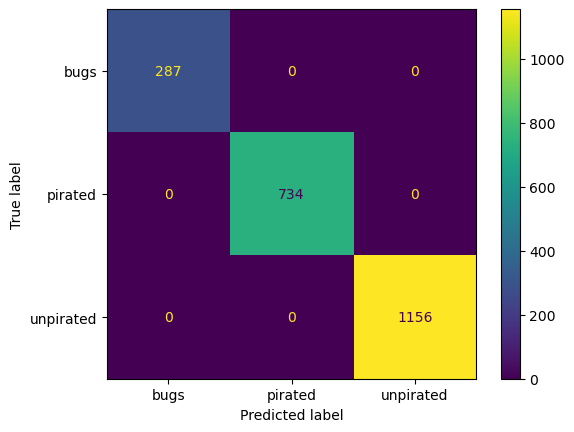

In [92]:
plot_confusion_matrix(clf, X_test, Y_test);

In [93]:
Y_test

array(['unpirated', 'unpirated', 'unpirated', ..., 'unpirated', 'pirated',
       'unpirated'], dtype=object)

In [94]:
print(classification_report(Y_test, test))

              precision    recall  f1-score   support

        bugs       1.00      1.00      1.00       287
     pirated       1.00      1.00      1.00       734
   unpirated       1.00      1.00      1.00      1156

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

